In [1]:
"""
Classification
	Decision Tree Classification
2. The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 
protease will cleave in the central position (between amino acids 4 and 5). Build a machine learning  model 
for the dataset, please refer document inside zip file for additional information
"""

'\nClassification\n\tDecision Tree Classification\n2. The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 \nprotease will cleave in the central position (between amino acids 4 and 5). Build a machine learning  model \nfor the dataset, please refer document inside zip file for additional information\n'

In [2]:
#import libraries
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt  
#library for feature scaling
from sklearn.preprocessing import StandardScaler
# #Classification library
from sklearn.tree import DecisionTreeClassifier

import pickle 
import os, sys
import csv
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import importlib.util

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [4]:
# load dataset
dataset_original = pd.read_csv ("746Data.txt", delimiter = ",",names=["Peptides", "Result"])
dataset = dataset_original
dataset.head()

,Peptides,Result
0,AAAKFERQ,-1
1,AAAMKRHG,-1
2,AAAMSSAI,-1
3,AAKFERQH,-1
4,AAKFESNF,-1


In [5]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 746 rows and 2 Columns


In [6]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
Peptides    746 non-null object
Result      746 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [7]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Result,746.0,0.077748,0.997642,-1.0,-1.0,1.0,1.0,1.0


In [8]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

Peptides    0
Result      0
dtype: int64

In [9]:
#check for NAN values
dataset.isna().sum()

Peptides    0
Result      0
dtype: int64

In [10]:
# check for duplicate values
dataset.duplicated().sum()

0

Skewness of y is -0.15628250375131236


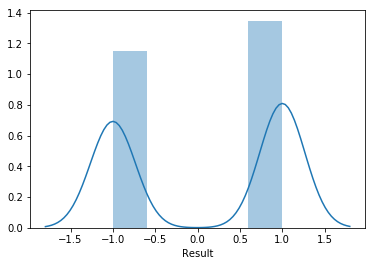

In [11]:
# check skewness for target variable
sb.distplot(dataset['Result'])
print ("Skewness of y is {}".format(dataset['Result'].skew()))

In [12]:
def remove_skew_square():
    print("\nSkewness for Target")
    dataset['Result'] = (np.sqrt(dataset['Result']))
    print("Mean: ",dataset['Result'].mean(),"Median: ", dataset['Result'].median(), 'Skewness is :', dataset['Result'].skew())

    print("Draw histogram")
    plt.hist(dataset['Result'])
    plt.show()
    
# remove_skew_square()
# Here if we remove skewness result gives large amount of NAN values

In [13]:
dataset.isna().sum()

Peptides    0
Result      0
dtype: int64

In [14]:
# Seperate all amino acids
peptides = np.array([[dataset["Peptides"][i][j] for i in range(dataset.shape[0])] for j in range(8)])
peptides.shape

(8, 746)

In [15]:
# Store the seperated amino acids into a dataframe
dataset2 = pd.DataFrame(peptides.T, columns=list('ABCDEFGH'))
dataset2.shape


(746, 8)

In [16]:
dataset2.head()

,A,B,C,D,E,F,G,H
0,A,A,A,K,F,E,R,Q
1,A,A,A,M,K,R,H,G
2,A,A,A,M,S,S,A,I
3,A,A,K,F,E,R,Q,H
4,A,A,K,F,E,S,N,F


In [17]:
# assign 2nd dataset to 1st one
dataset = dataset.assign(**dataset2)
#OR
# dataset = pd.concat([dataset,dataset2])
dataset.head()

,Peptides,Result,A,B,C,D,E,F,G,H
0,AAAKFERQ,-1,A,A,A,K,F,E,R,Q
1,AAAMKRHG,-1,A,A,A,M,K,R,H,G
2,AAAMSSAI,-1,A,A,A,M,S,S,A,I
3,AAKFERQH,-1,A,A,K,F,E,R,Q,H
4,AAKFESNF,-1,A,A,K,F,E,S,N,F


In [18]:
# drop unwanted column
dataset = dataset.drop(['Peptides'], axis=1)

In [19]:
dataset = dataset[['A','B','C','D','E','F','G','H','Result']]
dataset.head()

,A,B,C,D,E,F,G,H,Result
0,A,A,A,K,F,E,R,Q,-1
1,A,A,A,M,K,R,H,G,-1
2,A,A,A,M,S,S,A,I,-1
3,A,A,K,F,E,R,Q,H,-1
4,A,A,K,F,E,S,N,F,-1


In [20]:
print("Dataset shape",dataset.shape)
dataset.head()

Dataset shape (746, 9)


,A,B,C,D,E,F,G,H,Result
0,A,A,A,K,F,E,R,Q,-1
1,A,A,A,M,K,R,H,G,-1
2,A,A,A,M,S,S,A,I,-1
3,A,A,K,F,E,R,Q,H,-1
4,A,A,K,F,E,S,N,F,-1


In [22]:
# create directory to store csv files
# os.mkdir("CSV_files")

In [235]:
#split dataset into train, test and cross validation also save csv files
obj_util.splitdata(dataset, 0.30, 0.45,"CSV_files" )

train :  (522, 9)  test :  (224, 9)
train_data :  (287, 9)  crossV_data :  (235, 9)


In [236]:
# load train dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Train Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 
# load dataset for Cross Validation
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Cross validation Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Train Dataset has 287 rows and 9 Columns
Cross validation Dataset has 235 rows and 9 Columns


In [237]:
#data Preprocessing
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 9 columns):
A         287 non-null object
B         287 non-null object
C         287 non-null object
D         287 non-null object
E         287 non-null object
F         287 non-null object
G         287 non-null object
H         287 non-null object
Result    287 non-null int64
dtypes: int64(1), object(8)
memory usage: 20.3+ KB


In [238]:
train_dataset.head()

,A,B,C,D,E,F,G,H,Result
0,T,N,C,Y,Q,S,Y,S,-1
1,V,K,V,L,V,V,Q,P,1
2,Q,I,N,S,R,W,W,C,-1
3,A,R,V,L,A,N,A,M,-1
4,T,G,V,L,V,V,Q,P,1


In [239]:
# seperate fetures and label

x_train = train_dataset.loc[:, train_dataset.columns != 'Result'].values
y_train = train_dataset.loc[:,train_dataset.columns == 'Result'].values

# convert ndarray to dataframe
df1 =  pd.DataFrame(x_train)

print("x_train :",x_train.shape,"& y_train:",y_train.shape)

#for cross validation
x_crossval = CV_dataset.loc[:, CV_dataset.columns != 'Result'].values
y_crossval = CV_dataset.loc[:,CV_dataset.columns == 'Result'].values

# convert ndarray to dataframe
df2 =  pd.DataFrame(x_crossval)
print("x_cv :",x_crossval.shape,"& y_cv:",y_crossval.shape)

x_train : (287, 8) & y_train: (287, 1)
x_cv : (235, 8) & y_cv: (235, 1)


In [240]:
df2.shape

(235, 8)

In [241]:
# Handle categorical data
x_train_dataset = obj_util.Categorical_data(df1)

In [242]:
# Handle categorical data for cross validation dataset
cv_dataset = obj_util.Categorical_data(df2)

In [243]:
x_train_dataset.shape, cv_dataset.shape

((287, 159), (235, 159))

In [244]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_train,x_crossval):
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    
    sc_x_cv = StandardScaler()
    x_crossval = sc_x.fit_transform(x_crossval)
    
    return sc_x, x_train,sc_x_cv, x_crossval
    
sc_x, x_train,sc_x_cv, x_crossval = feature_scalling(x_train_dataset,cv_dataset)


In [245]:
print(len(x_train), len(x_crossval))

287 235


In [246]:
class DecisionTreeClassification():
    
    def create_module(self,x_train,y_train):
        # fitting KNN Classification to the training set
        classifier = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
        classifier.fit(x_train,y_train)
        return classifier
    

def main():
    #class obj created
    obj  = DecisionTreeClassification()

    classifier = obj.create_module(x_train,y_train)
    print("\nModule created")
#     print("classifier object",classifier)

    # y prediction
    y_pre = obj_util.y_prediction(x_train, classifier)
#     print("\n\n y_prediction:",y_pre)
#     print(y_pre.shape)
    
    # calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_train)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # confusion matrxi
    cm = obj_util.confusion_matrix(y_train,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
#     obj_util.visualization(x_train,y_train, classifier, "DecisionTree Classification(Training set)", "Age", "Estimate Salary")
    
    obj_util.create_piklefile(classifier,'DecisionTree2.pkl' )
    print("\nPikle file created")


if __name__ == '__main__':
    main()



Module created


Average accuracy_score: 100.0
Average precision-recall score: 100.00
Average Roc-AUC: 100.000


Confusion Matrix:
 [[131   0]
 [  0 156]]

Pikle file created


In [247]:
# cross validation        
def Cross_validation():
    file1 = open('DecisionTree2.pkl', 'rb')
    classifier1 = pickle.load(file1)

    # y_prediction ( cross validation) 
    y_predicted1 = obj_util.y_prediction(x_crossval, classifier1)
#     print("\n\n y_prediction:",y_predicted1)
    
    # Calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_predicted1, y_crossval)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)

    # show confusion matrix
    cm = obj_util.confusion_matrix(y_crossval, y_predicted1)
    print("\n\nConfusion Matrix:\n",cm)
#     print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_crossval, y_predicted1))
    
#     obj_util.visualization(x_crossval, y_crossval, classifier1, "DecisionTreeCross_validation set)", "Age", "Estimate Salary")
    
    
    

Cross_validation()




Average accuracy_score: 46.38297872340426
Average precision-recall score: 53.67
Average Roc-AUC: 49.216


Confusion Matrix:
 [[ 91  17]
 [109  18]]
